In [1]:
%matplotlib inline
from sklearn_model_eval import plots
from sklearn_model_eval import tables

import numpy as np
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

## Plotting confusion matrix
Example taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

/Users/Edu/Envs/sklearn_model_eval/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


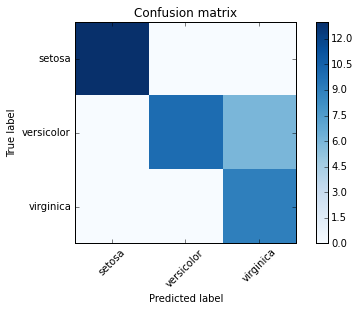

In [3]:
plots.confusion_matrix_(y_test, y_pred, target_names=iris.target_names)

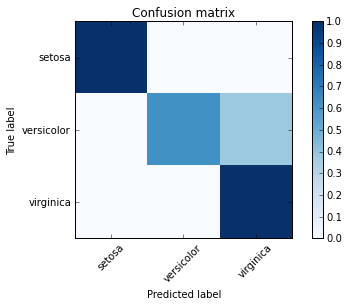

In [4]:
plots.confusion_matrix_(y_test, y_pred, target_names=iris.target_names, normalize=True)

## Receiver operating characteristic (ROC)
Related example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [5]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

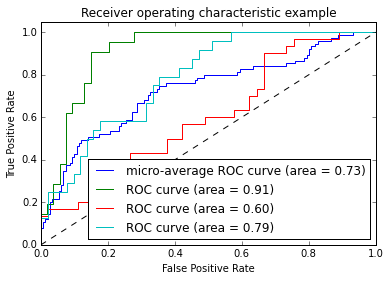

In [22]:
#Plot ROC curve for a multi-class classifier
plots.roc(y_test, y_score)

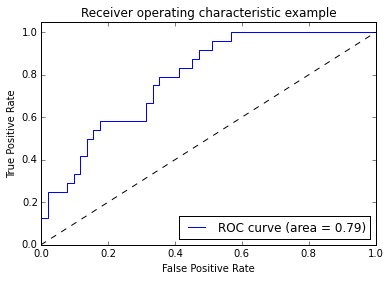

In [25]:
#Or plot a curve for a single class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
plots.roc(y_test_bin[:,2], y_score[:,2])

## Precision-Recall
Related example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [32]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

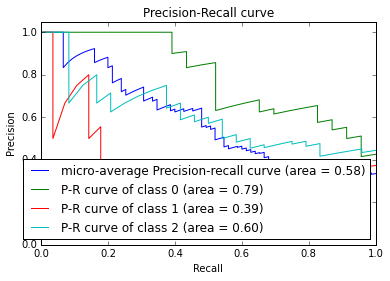

In [29]:
plots.precision_recall(y_test, y_score)

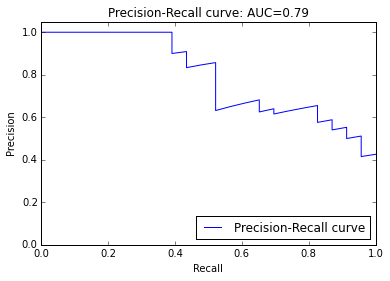

In [31]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
plots.precision_recall(y_test_bin[:,0], y_score[:,0])

## Feature importance
Example taken from: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [2]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest = forest.fit(X, y)
feature_list = map(lambda x: 'Feature '+str(x), range(10))

/Users/Edu/Envs/sklearn_model_eval/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


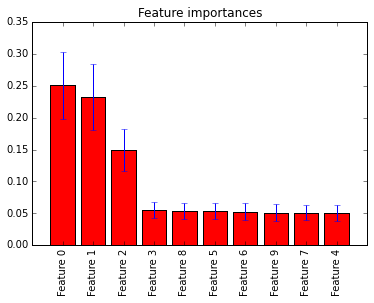

In [3]:
plots.feature_importance(forest, feature_list)

In [14]:
print tables.feature_importances(forest, feature_list, format='grid')

+-----------+-----------+---+-----------+
| 0.250398  | 0.0530907 | 0 | Feature 0 |
+-----------+-----------+---+-----------+
| 0.232397  | 0.0523836 | 1 | Feature 1 |
+-----------+-----------+---+-----------+
| 0.148898  | 0.0331814 | 2 | Feature 2 |
+-----------+-----------+---+-----------+
| 0.0553634 | 0.0128296 | 3 | Feature 3 |
+-----------+-----------+---+-----------+
| 0.05401   | 0.0122248 | 8 | Feature 8 |
+-----------+-----------+---+-----------+
| 0.053878  | 0.01289   | 5 | Feature 5 |
+-----------+-----------+---+-----------+
| 0.0525828 | 0.0130225 | 6 | Feature 6 |
+-----------+-----------+---+-----------+
| 0.0510197 | 0.0129436 | 9 | Feature 9 |
+-----------+-----------+---+-----------+
| 0.0509633 | 0.0117197 | 7 | Feature 7 |
+-----------+-----------+---+-----------+
| 0.0504887 | 0.012844  | 4 | Feature 4 |
+-----------+-----------+---+-----------+
